In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Data/forestfires_cleaned.csv')
df.head()

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
for col in df.columns:
    print(col, df[f'{col}'].dtype)

Unnamed: 0 int64
X int64
Y int64
month int64
day int64
FFMC float64
DMC float64
DC float64
ISI float64
temp float64
RH int64
wind float64
rain float64
area float64


In [14]:
for col in df.columns:
    if df[f'{col}'].dtype == 'float64' and col != 'area':
        mean = df[col].mean()
        std = df[col].std()
        df[col] = (df[col] - mean) / std

In [15]:
df.head()

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,7,5,3,5,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,51,1.497164,-0.073197,0.0
1,1,7,4,10,2,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,33,-1.740070,-0.073197,0.0
2,2,7,4,10,6,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,33,-1.516813,-0.073197,0.0
3,3,8,6,3,5,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,97,-0.009824,0.602572,0.0
4,4,8,6,3,0,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,99,-1.237741,-0.073197,0.0


In [16]:
class LinearRegression:
    def fit(self , X : np.ndarray, Y : np.ndarray) -> None:
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        #self.theta_ : np.ndarray = np.matmul(int_cov, np.matmul(X.T,Y))
        self.theta_ : np.ndarray = inv_cov @ (X.T @ Y)
    
    def rmse(self, y : np.ndarray , y_hat : np.ndarray) -> float:
        delta = y - y_hat
        return (delta**2).mean()**0.5
    
    def predict (self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        return y_pred

In [17]:
X_y = df.to_numpy()

In [18]:
X_y.shape

(517, 14)

In [19]:
N = df.shape[0]
X_y_train , X_y_test = np.split (X_y, indices_or_sections=[int (0.8 * N)])

In [20]:
X_train = X_y_train[ : , :-1]
y_train = X_y_train[ : , -1]

X_test = X_y_test[ : , :-1]
y_test = X_y_test[ : , -1]

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
Y_predict = lr.predict(X_test)

In [22]:
Y_predict

array([38.56600279, 23.20535855, 33.13489727, 26.45516933, 14.55014932,
       23.05505029, 22.64079567, 30.48435915, 28.0274852 , 35.23324629,
       19.71619235, 39.5693896 , 28.87199779, 30.62735255, 27.38798156,
       28.15366893, 22.5905481 , 37.42961015, 29.14862323, 30.11093957,
       16.40453187, 33.31362708, 22.29677581, 29.97717988, 25.19917108,
       29.29311757, 18.50510812, 32.83544891, 31.26581893,  7.97563264,
        5.5257852 , 29.57895721,  6.49857728, 16.80719961,  9.85726071,
       22.99383355, 20.76825342, 20.02234227,  7.65526764, 23.76351523,
       29.9089478 , 27.87168954, 11.27416947, 26.18625752, 23.2806749 ,
       30.00749618, 31.12975365, 25.82829592, 30.09755855, 18.39545009,
        1.06010544,  3.1209841 , 10.31971592,  8.69095793, 11.15004325,
       17.25468439, 11.69342508, 12.03157723, 22.70229122, 15.75265162,
       26.25741852, 25.90893741, 17.03542565, 27.1422481 , 14.74991524,
        4.76435423, 20.60630456, 29.29048358, 30.9471297 , 16.00

In [23]:
print(f'{lr.rmse(y_test, Y_predict):.20f}')

79.38123063063737561151


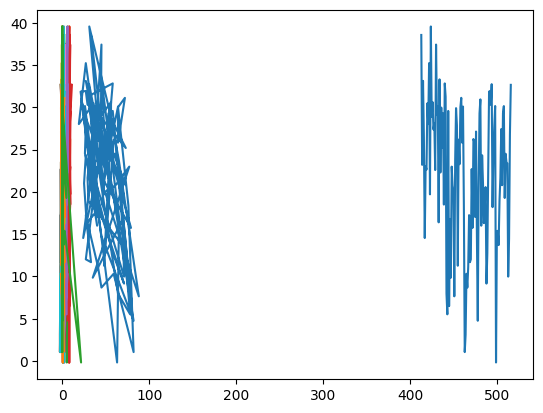

In [24]:
plt.plot(X_test, Y_predict.T)

So sánh:


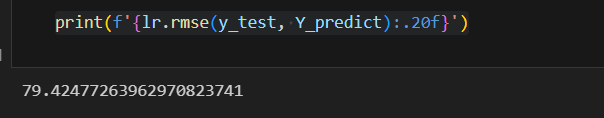

Có thể thấy rằng sau khi chuẩn hoá dữ liệu về phân phối có kỳ vọng là 0 và phương sai là 1, thì khi tính Root Mean Square Error (RMSE) sẽ nhỏ hơn so với RMSE của dữ liệu trước khi chuẩn hóa.